# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Config information.

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL

query_url = f"{url}appid={weather_api_key}&units={units}&q="        

In [4]:
# set up lists to hold reponse info

lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | tumpat
Processing Record 4 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | byron bay
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | gizo
Processing Record 11 of Set 1 | narsaq
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | tuatapere
Processing Record 16 of Set 1 | cayenne
Processing Record 17 of Set 1 | tubuala
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | krasnoselkup
Processing Record 21 of Set 1 | reconquista
Processing Record 22 of Set 1 | puert

Processing Record 40 of Set 4 | gambo
Processing Record 41 of Set 4 | berlevag
Processing Record 42 of Set 4 | port elizabeth
Processing Record 43 of Set 4 | iqaluit
Processing Record 44 of Set 4 | lima
Processing Record 45 of Set 4 | vestmannaeyjar
Processing Record 46 of Set 4 | nikolskoye
Processing Record 47 of Set 4 | saint-philippe
Processing Record 48 of Set 4 | korla
Processing Record 49 of Set 4 | abaetetuba
Processing Record 50 of Set 4 | willowmore
Processing Record 1 of Set 5 | tabou
Processing Record 2 of Set 5 | hurghada
Processing Record 3 of Set 5 | tsabong
Processing Record 4 of Set 5 | haibowan
City not found. Skipping...
Processing Record 5 of Set 5 | geraldton
Processing Record 6 of Set 5 | torbay
Processing Record 7 of Set 5 | shablykino
Processing Record 8 of Set 5 | bima
Processing Record 9 of Set 5 | umm kaddadah
Processing Record 10 of Set 5 | saint anthony
Processing Record 11 of Set 5 | flinders
Processing Record 12 of Set 5 | chongwe
Processing Record 13 of 

Processing Record 25 of Set 8 | deputatskiy
Processing Record 26 of Set 8 | kaitangata
Processing Record 27 of Set 8 | roebourne
Processing Record 28 of Set 8 | loiza
Processing Record 29 of Set 8 | acajutla
Processing Record 30 of Set 8 | balestrand
Processing Record 31 of Set 8 | luanda
Processing Record 32 of Set 8 | arcachon
Processing Record 33 of Set 8 | mrirt
City not found. Skipping...
Processing Record 34 of Set 8 | jiexiu
Processing Record 35 of Set 8 | porto novo
Processing Record 36 of Set 8 | touros
Processing Record 37 of Set 8 | preeceville
Processing Record 38 of Set 8 | premia de mar
Processing Record 39 of Set 8 | abu samrah
Processing Record 40 of Set 8 | la ronge
Processing Record 41 of Set 8 | corinth
Processing Record 42 of Set 8 | eenhana
Processing Record 43 of Set 8 | seoul
Processing Record 44 of Set 8 | qaanaaq
Processing Record 45 of Set 8 | chegdomyn
Processing Record 46 of Set 8 | trairi
Processing Record 47 of Set 8 | iralaya
Processing Record 48 of Set 8

City not found. Skipping...
Processing Record 13 of Set 12 | ocampo
Processing Record 14 of Set 12 | rocha
Processing Record 15 of Set 12 | port augusta
Processing Record 16 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 17 of Set 12 | basco
Processing Record 18 of Set 12 | maniitsoq
Processing Record 19 of Set 12 | fallon
Processing Record 20 of Set 12 | sulangan
Processing Record 21 of Set 12 | barcelos
Processing Record 22 of Set 12 | chimoio
Processing Record 23 of Set 12 | solsvik
City not found. Skipping...
Processing Record 24 of Set 12 | izazi
Processing Record 25 of Set 12 | scarborough
Processing Record 26 of Set 12 | sakakah
Processing Record 27 of Set 12 | praia da vitoria
Processing Record 28 of Set 12 | kidal
Processing Record 29 of Set 12 | peniche
Processing Record 30 of Set 12 | am timan
Processing Record 31 of Set 12 | canutama
Processing Record 32 of Set 12 | kununurra
Processing Record 33 of Set 12 | wajir
Processing Record 34 of Set 12 | manga
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert raw data to dataframe

city_weather_df = pd.DataFrame({
    "City": cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": temp_max,
    "Wind Speed": wind_speed
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API

city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

# Export the city data into a .csv file

city_weather_df.to_csv("./output_data/cities.csv", index=False)

# Display the DataFrame

weather_df = pd.read_csv("./output_data/cities.csv")

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Latitude      546
Longitude     546
Max Temp      546
Wind Speed    546
dtype: int64


In [6]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,chokurdakh,1.0,RU,1.592843e+09,65.0,70.63,147.92,43.02,13.13
1,saint george,1.0,US,1.592843e+09,14.0,37.10,-113.58,87.01,5.82
2,tumpat,40.0,MY,1.592843e+09,94.0,6.20,102.17,77.00,2.24
3,hobart,90.0,AU,1.592843e+09,93.0,-42.88,147.33,55.99,6.93
4,byron bay,0.0,AU,1.592843e+09,66.0,-28.65,153.62,52.00,6.93


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

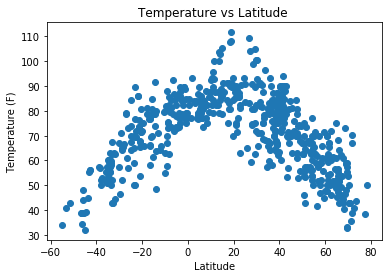

In [10]:
# Create a scatter plot for latitude vs max temperature.

x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("Temperature vs Latitude ")
plt.savefig("./Images/temperature_vs_latitude.png", bbox_inches="tight")
plt.show()

## Latitude vs. Humidity Plot

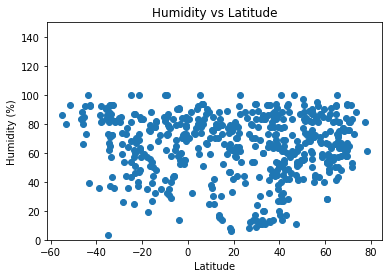

In [11]:
# Create a scatter plot for latitude vs humidity.

x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude')
plt.ylim(0, 150)
plt.savefig("./Images/humidity_vs_latitude.png", bbox_inches="tight")
plt.show()

## Latitude vs. Cloudiness Plot

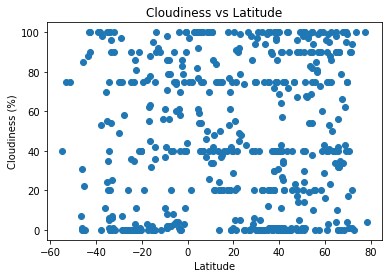

In [12]:
# Create a scatter plot for latitude vs cloudiness.

x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude')
plt.savefig("./Images/cloudiness_vs_latitude.png", bbox_inches="tight")
plt.show()

## Latitude vs. Wind Speed Plot

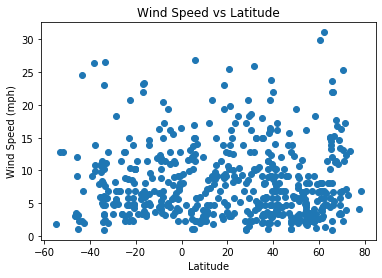

In [13]:
# Create a scatter plot for latitude vs wind speed.

x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed vs Latitude')
plt.savefig("./Images/wind_speed_vs_latitude.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    
    # Print r square value
    
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig(f"./Images/{hemisphere}_{y_label}_vs_{x_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")


#determine northern and southern hemisphere cities

northern_hemisphere = []
southern_hemisphere = []

for index, row in weather_df.iterrows():

    if row["Latitude"] > 0:
        northern_hemisphere.append(row)
    else:
        southern_hemisphere.append(row)

In [15]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere_df = pd.DataFrame(northern_hemisphere)
southern_hemisphere_df = pd.DataFrame(southern_hemisphere)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.562570891887983
The correlation between both factors is -0.75


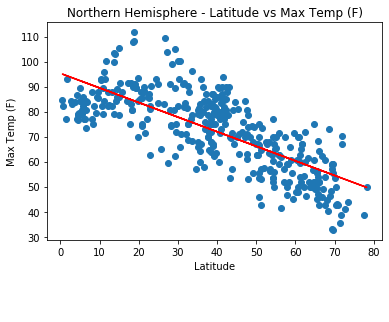

In [16]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)

x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Northern",(0, 0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6524446943779949
The correlation between both factors is 0.81


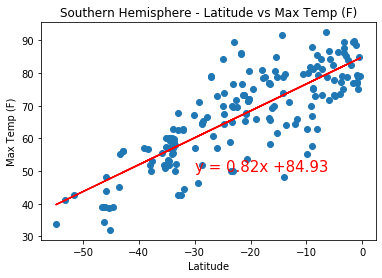

In [17]:
# Create a scatter plot for latitude vs max temp (southern hemisphere)

x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Southern",(-30, 50))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0023668615820982516
The correlation between both factors is 0.05


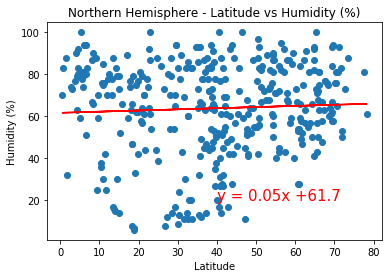

In [18]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)

x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0023668615820982516
The correlation between both factors is 0.05


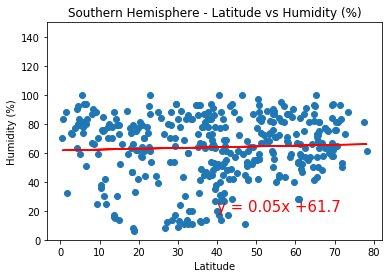

In [19]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)

x_values1 = southern_hemisphere_df['Latitude']
y_values1 = southern_hemisphere_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0002510010084721556
The correlation between both factors is -0.02


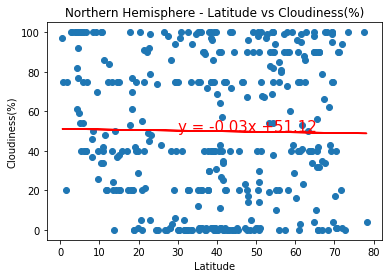

In [20]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)

x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004446794814115358
The correlation between both factors is 0.07


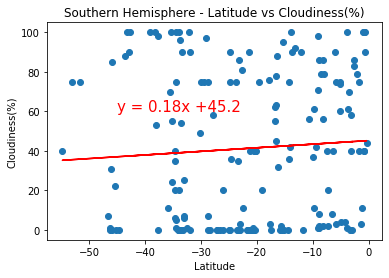

In [21]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)

x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00026827157825418417
The correlation between both factors is -0.02


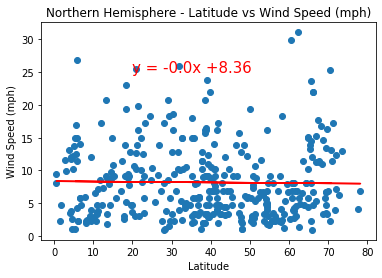

In [22]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)

x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004725701818664807
The correlation between both factors is 0.07


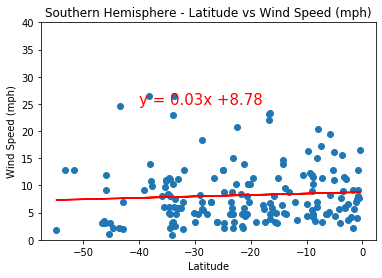

In [23]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)

x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)